In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df_orig = pd.read_csv('data/food_order.csv')

In [4]:
df = df_orig.copy()

In [5]:
df = df.iloc[:,1:]

In [6]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

In [7]:
df.isna().sum()

customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
total_time               0
dtype: int64

In [8]:
df['rating']

0       Not given
1       Not given
2               5
3               3
4               4
          ...    
1893            5
1894            5
1895    Not given
1896            5
1897    Not given
Name: rating, Length: 1898, dtype: object

In [9]:
df.loc[df['rating'] == 'Not given', 'rating'] = np.nan

In [10]:
df['rating'] = df['rating'].astype(float)

In [11]:
df['rating'] = df['rating'].fillna(df.groupby('restaurant_name')['rating'].transform('mean'))

In [12]:
df = df.dropna()

In [13]:
df.describe()

,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time,total_time
count,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000
mean,170801.970021,16.512195,4.349154,27.361349,24.185225,51.546574
std,113536.338875,7.473723,0.610783,4.628866,4.960147,6.818127
min,1311.000000,4.470000,3.000000,20.000000,15.000000,35.000000
25%,77544.000000,12.080000,4.000000,23.000000,20.000000,47.000000
50%,128476.500000,14.160000,4.328125,27.000000,25.000000,52.000000
75%,270444.000000,22.272500,5.000000,31.000000,28.000000,56.000000
max,405334.000000,35.410000,5.000000,35.000000,33.000000,68.000000


In [14]:
df['restaurant_name'].nunique()

156

In [15]:
df['day_of_the_week'].nunique()

2

In [16]:
df['cuisine_type'].nunique()

14

In [17]:
df

,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
1,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.333333,25,23,48
2,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28,51
3,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15,40
4,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24,49
5,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.000000,20,24,44
...,...,...,...,...,...,...,...,...,...
1893,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.000000,31,17,48
1894,397537,The Smile,American,12.18,Weekend,5.000000,31,19,50
1895,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,4.219178,31,24,55
1896,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5.000000,23,31,54


In [37]:
df

,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
1,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.333333,25,23,48
2,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28,51
3,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15,40
4,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24,49
5,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.000000,20,24,44
...,...,...,...,...,...,...,...,...,...
1893,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.000000,31,17,48
1894,397537,The Smile,American,12.18,Weekend,5.000000,31,19,50
1895,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,4.219178,31,24,55
1896,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5.000000,23,31,54


In [18]:
# 레스토랑별 평균 주문 가격, 별점평균, 배달까지 걸리는 시간
df.groupby('restaurant_name')[['cost_of_the_order', 'rating', 'total_time']].mean()

,cost_of_the_order,rating,total_time
restaurant_name,,,
'wichcraft,8.100000,5.000000,56.000000
12 Chairs,22.142500,4.500000,54.750000
5 Napkin Burger,15.968000,4.000000,54.600000
67 Burger,29.050000,5.000000,48.000000
Amma,19.172500,4.500000,47.750000
...,...,...,...
Zero Otto Nove,9.025000,4.000000,51.500000
brgr,9.895000,3.000000,50.000000
da Umberto,17.620000,5.000000,52.333333


In [58]:
# 주문수가 10번 이상인 데이터 
data10 = df['restaurant_name'].value_counts().to_frame().reset_index()
data10.columns = ['restaurant_name', 'restaurant_cnt']
data10 = data[data['restaurant_cnt']>=10]

In [81]:
# 주문수가 10번 이상인 데이터프레임의 평균주문가격, 별점평균, 배달까지 걸리는 시간
df[df['restaurant_name'].isin(data10['restaurant_name'])].groupby('restaurant_name')[[ 'cost_of_the_order' ,'rating', 'total_time']].mean().reset_index()

,restaurant_name,cost_of_the_order,rating,total_time
0,Balthazar Boulangerie,18.701000,4.200000,53.600000
1,Bareburger,14.805185,4.058824,51.962963
2,Blue Ribbon Fried Chicken,17.315521,4.328125,51.343750
3,Blue Ribbon Sushi,15.999580,4.219178,51.865546
4,Blue Ribbon Sushi Bar & Grill,15.150455,4.590909,49.704545
5,Blue Ribbon Sushi Izakaya,16.727241,4.333333,52.206897
6,Burger Joint,12.892500,4.250000,50.583333
7,Cafe Habana,13.581875,4.272727,52.312500
8,Cafe Mogador,18.317778,4.153846,48.222222
9,Chipotle Mexican Grill $1.99 Delivery,21.377826,4.200000,49.869565


In [20]:
# 평일, 주말 주문수
df.value_counts('day_of_the_week')

day_of_the_week
Weekend    1325
Weekday     543
dtype: int64

In [23]:
# 평일 주말 주문의 평균 가격
df.groupby('day_of_the_week')['cost_of_the_order'].mean()

day_of_the_week
Weekday    16.342118
Weekend    16.581894
Name: cost_of_the_order, dtype: float64

C:\Users\q1035\AppData\Local\Temp\ipykernel_1800\863688312.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  df.value_counts('cuisine_type').sort_values(False).plot(kind= 'barh')


[]

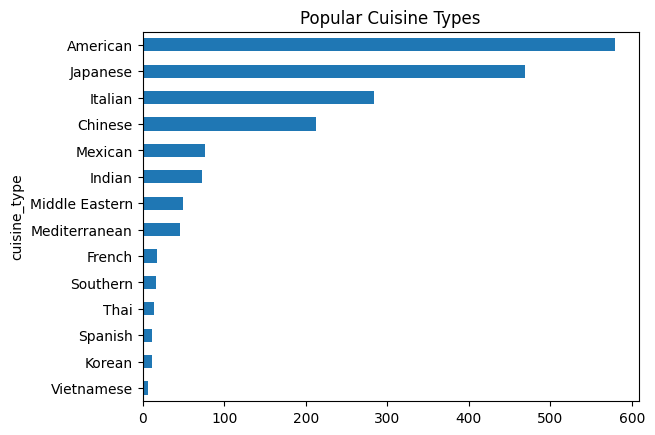

In [112]:
# 가장 인기 많은 음식 타입
df.value_counts('cuisine_type').sort_values(False).plot(kind= 'barh')
plt.title('Popular Cuisine Types')
plt.plot()

<AxesSubplot:xlabel='cuisine_type'>

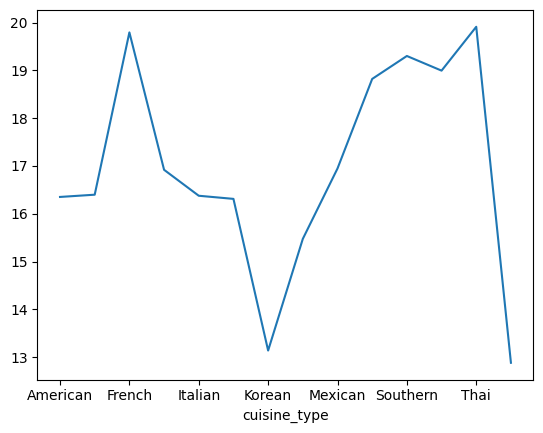

In [110]:
df.groupby('cuisine_type')['cost_of_the_order'].mean().plot()